# Web scraping

* `
Extracting data from websites
`

by making HTTP requests to access the site's content and then parsing the HTML to collect specific information


---



## Essential Packages and Tools


*   ***requests*** – For Sending HTTP Requests

*   ***BeautifulSoup*** (from bs4) – For Parsing HTML
*   ***lxml*** – A High-Performance HTML/XML Parser
*   ***Selenium*** – For Scraping JavaScript-Rendered Content
*   ***Scrapy*** – A High-Level Web Scraping Framework
*   ***pandas*** – For Storing and Processing Scraped Data
*   ***fake_useragent*** – For Randomizing User-Agent Headers
*   ***PyQuery*** – jQuery-like Syntax for Parsing HTML
*   ***requests_html*** – For JavaScript Rendering (Alternative to Selenium)
*   ***CloudScraper*** – For Bypassing Anti-Scraping Techniques


---



Outline:
1. ***Basic scraping*** :   requests, BeautifulSoup, lxml.
2. ***Dynamic content*** :  Selenium, requests_html.
3. ***Scaling and efficiency*** :  Scrapy.
4. ***Data processing*** : pandas.
5. ***Bypassing anti-scraping*** : fake_useragent, cloudscraper.



## Setting Up Your Environment

* Web scraping in Python requires Python 3.x.

Creating a virtual environment:

```
# Navigate to your project directory
mkdir my_scraping_project
cd my_scraping_project

# Create a virtual environment (you can name it anything, here it's 'venv')
python -m venv venv
```

 Install Essential Libraries


```
pip install requests
pip install beautifulsoup4
pip install lxml
pip install fake-useragent
pip install selenium
pip install scrapy
pip install pandas
pip install requests-html

```

Set Up WebDriver for Selenium


```
# Install Google Chrome and the required WebDriver
!apt-get install -y chromium-chromedriver
!pip install selenium webdriver-manager
```







In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install fake-useragent
!pip install selenium
!pip install scrapy
!pip install pandas
!pip install requests-html

## HTTP Requests

In [ ]:
import requests

url = 'https://www.wikipedia.org/'  # Replace with the URL you want to scrape
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print('Successfully fetched the webpage')
else:
    print(f'Failed to retrieve the webpage, status code: {response.status_code}')

Successfully fetched the webpage


### ***GET Request***

Typically used to fetch data, like web pages or API responses.

In [ ]:
import requests

response = requests.get('https://www.example.com')

print(response.text)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

### attributes of response

In [ ]:

# for attribute in dir(response):
#     print(attribute)
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [ ]:
# Print all attributes and methods of the response object
for key, value in response.__dict__.items():
    print(f"{key[:20].ljust(20)}: {value}")

_content            : b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\

In [ ]:
# Headers
print(response.headers)
for key, value in response.headers.items():
    print(f"{key[:20].ljust(20)}:\t {value}")

{'Content-Encoding': 'gzip', 'Age': '264683', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Mon, 09 Dec 2024 11:39:55 GMT', 'Etag': '"3147526947+gzip"', 'Expires': 'Mon, 16 Dec 2024 11:39:55 GMT', 'Last-Modified': 'Thu, 17 Oct 2019 07:18:26 GMT', 'Server': 'ECAcc (lac/5588)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '648'}
Content-Encoding    :	 gzip
Age                 :	 264683
Cache-Control       :	 max-age=604800
Content-Type        :	 text/html; charset=UTF-8
Date                :	 Mon, 09 Dec 2024 11:39:55 GMT
Etag                :	 "3147526947+gzip"
Expires             :	 Mon, 16 Dec 2024 11:39:55 GMT
Last-Modified       :	 Thu, 17 Oct 2019 07:18:26 GMT
Server              :	 ECAcc (lac/5588)
Vary                :	 Accept-Encoding
X-Cache             :	 HIT
Content-Length      :	 648


In [ ]:
print(response.cookies)

<RequestsCookieJar[]>


In [ ]:
print(response.url)

https://www.example.com/


In [ ]:
# Check if there were any redirects
if response.history:
    print("Redirect History:", [r.url for r in response.history])
else:
    print("No redirects.")

Redirect History: ['https://w3schools.com/python/demopage.htm']


###Handling Json data

https://jsonplaceholder.typicode.com/posts

In [ ]:
import requests

response = requests.get('https://jsonplaceholder.typicode.com/posts')
print(response.status_code)  # HTTP status code
print(len(response.text))         # Response content as a string

200
27520


In [ ]:
json_data = response.json()
print(f'Total length of Users info: {len(json_data)}')

print(f'\nPrinting first 5 Users info')
json_data[:5]

Total length of Users info: 100

Printing first 5 Users info


[{'userId': 1,
  'id': 1,
  'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
  'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'},
 {'userId': 1,
  'id': 2,
  'title': 'qui est esse',
  'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'},
 {'userId': 1,
  'id': 3,
  'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut',
  'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'},
 {'userId': 1,
  'id': 4,
  'title': 'eum et est occaecati',
  'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provid

In [ ]:
print(json_data[0].keys())
print(json_data[0].values())

dict_keys(['userId', 'id', 'title', 'body'])
dict_values([1, 1, 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'])


### Handling Query Parameters

In [ ]:
url = 'https://jsonplaceholder.typicode.com/posts'
params = {'userId': 1}

response = requests.get(url, params=params)
response.json()


[{'userId': 1,
  'id': 1,
  'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
  'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'},
 {'userId': 1,
  'id': 2,
  'title': 'qui est esse',
  'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'},
 {'userId': 1,
  'id': 3,
  'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut',
  'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'},
 {'userId': 1,
  'id': 4,
  'title': 'eum et est occaecati',
  'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provid

In [ ]:
url = 'https://jsonplaceholder.typicode.com/posts'
params = {'userId': 1,'id': 1}

response = requests.get(url, params=params)
response.json()

[{'userId': 1,
  'id': 1,
  'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
  'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}]

### Handling Timeouts

In [ ]:
try:
    response = requests.get('https://jsonplaceholder.typicode.com/posts', timeout=5)
    print(response.status_code)
except requests.exceptions.Timeout:
    print("The request timed out.")

200


### ***POST Request***

Often used when submitting forms or uploading data.

Sends data to the server to create or update a resource.

In [ ]:
import requests

url = 'https://jsonplaceholder.typicode.com/posts'
data = {
    'title': 'foo',
    'body': 'bar',
    'userId': 1
}
response = requests.post(url, json=data)

print(response.status_code)
print(response.json())

201
{'title': 'foo', 'body': 'bar', 'userId': 1, 'id': 101}


###Handling HTTP Errors
If a request fails (e.g., 404 or 500), requests won’t throw an exception unless you explicitly check for errors.

In [ ]:
response = requests.get('https://jsonplaceholder.typicode.com/invalid-url')
if response.status_code != 200:
    print(f"Error: {response.status_code}")

Error: 404


In [ ]:
try:
    response = requests.get('https://jsonplaceholder.typicode.com/invalid-url')
    response.raise_for_status()  # Raises HTTPError for bad responses
except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")

HTTP error occurred: 404 Client Error: Not Found for url: https://jsonplaceholder.typicode.com/invalid-url


### File Uploads

In [ ]:
url = 'https://httpbin.org/post'
files = {'file': open('example.txt', 'rb')}
response = requests.post(url, files=files)
print(response.text)

{
  "args": {}, 
  "data": "", 
  "files": {
    "file": ""
  }, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "147", 
    "Content-Type": "multipart/form-data; boundary=a2d5f2e91f62ff97e08a96b49e3bbdd0", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-6756d178-0e0cd5a87e4f90b07dcacd97"
  }, 
  "json": null, 
  "origin": "34.106.191.177", 
  "url": "https://httpbin.org/post"
}



### ***PUT Request***

Updates an existing resource or creates one if it doesn't exist.

In [ ]:
import requests

# URL of the resource you want to update
url = 'https://jsonplaceholder.typicode.com/posts/1'

response = requests.get(url)
print("Original Post:")
response.json()

Original Post:


{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [ ]:
# Data to send in the request (usually in JSON format for REST APIs)
data = {
    "title": "Updated Title",
    "body": "This is the updated body content.",
    "userId": 1
}

# Make the PUT request
response = requests.put(url, json=data)

# Print the response status code and the content returned by the server
print(f"Status Code: {response.status_code}")
print(f"Response Body: {response.text}")


Status Code: 200
Response Body: {
  "title": "Updated Title",
  "body": "This is the updated body content.",
  "userId": 1,
  "id": 1
}


### ***DELETE Request***
Deletes a specified resource from the server

In [ ]:
response = requests.delete('https://jsonplaceholder.typicode.com/posts/1')
response.text

'{}'

### ***PATCH Request***
Partially updates a resource.

Used when you want to update only specific fields in a resource.


In [ ]:
response = requests.patch('https://jsonplaceholder.typicode.com/posts/1', data={'title': 'patched title'})
response.json()

{'userId': 1,
 'id': 1,
 'title': 'patched title',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

### ***HEAD Request***
Similar to GET, but it retrieves only the headers, not the body of the response.

In [ ]:
response = requests.head('https://jsonplaceholder.typicode.com/posts')
print('response text',response.text)
response.headers

response text 


{'Date': 'Mon, 09 Dec 2024 12:17:54 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Connection': 'keep-alive', 'Report-To': '{"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1732622443&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=DIATkaSeZpMRslaMIpIn6QUX7JmrAjxmEh%2F5WUbiAJw%3D"}]}', 'Reporting-Endpoints': 'heroku-nel=https://nel.heroku.com/reports?ts=1732622443&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=DIATkaSeZpMRslaMIpIn6QUX7JmrAjxmEh%2F5WUbiAJw%3D', 'Nel': '{"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}', 'X-Powered-By': 'Express', 'X-Ratelimit-Limit': '1000', 'X-Ratelimit-Remaining': '999', 'X-Ratelimit-Reset': '1732622496', 'Vary': 'Origin, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'max-age=43200', 'Pragma': 'no-cache', 'Expires': '-1', 'X-Content-Type-Options': 'nosniff', 'Etag': 'W/"6b80-Ybsq/K6GwwqrYkAsFxqDXGC7DoM"', 'C

### Basic Authentication

In [ ]:
from requests.auth import HTTPBasicAuth

url = 'https://httpbin.org/basic-auth/user/passwd'
response = requests.get(url, auth=HTTPBasicAuth('user', 'passwd'))
print(response.status_code)


200


### requests.Session()

In [ ]:
with requests.Session() as session:
    session.headers.update({'User-Agent': 'my-app'})
    response1 = session.get('https://jsonplaceholder.typicode.com/posts')
    response2 = session.get('https://jsonplaceholder.typicode.com/users')

    print(response1.status_code)
    print(response2.status_code)
    session.close()


200
200


### Binary Response Content

200


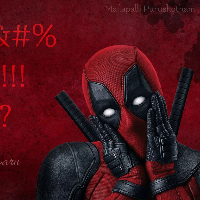

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Make a request to an endpoint that returns binary content (e.g., an image or PDF)
url = 'https://drive.google.com/uc?export=download&id=1D91UYKoobRN9Hh8Jqp_nz3i0vlyq3ehj'
response = requests.get(url)
print(response.status_code)

# The binary content is available in the 'content' attribute
binary_data = response.content

# binary content to image
i = Image.open(BytesIO(binary_data))
open_cv_image = np.array(i)
open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2BGR)
cv2_imshow(cv2.resize(open_cv_image,(200,200)))

## BeautifulSoup - Parsing the HTML Content

In [ ]:
import requests

# URL of the page to scrape
url = 'https://www.wikipedia.org'

# Send a GET request to the URL
response = requests.get(url)
response.text

'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/4.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-de847d1a.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{

Once you have the HTML content, you'll want to parse it to extract the data you're interested in.

In [ ]:
from bs4 import BeautifulSoup

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Print the parsed HTML
    print(soup.prettify())  # 'prettify' formats the output for readability
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Wikipedia
  </title>
  <meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
  </script>
  <meta content="initial-scale=1,user-scalable=yes" name="viewport"/>
  <link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>
  <link href="/static/favicon/wikipedia.ico" rel="shortcut icon"/>
  <link href="//creativecommons.org/licenses/by-sa/4.0/" rel="license"/>
  <style>
   .sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-de847d1a.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg

### soup.find()

Find the first occurrence of a tag

soup.find() returns the first matching tag.

In [ ]:
# Find the first <h1> tag in the HTML
h1_tag = soup.find('h1')
print(h1_tag.text)  # Extract the text from the <h1> tag




Wikipedia

The Free Encyclopedia



In [ ]:
  # Extract the text from the <p> inside <body> tag
soup = BeautifulSoup(response.text, 'html.parser')
h1_tag = soup.find('body').find('p')
print(h1_tag.text)

An important update for readers in the United States.


In [ ]:
# Find the first <p> tag in the HTML
h1_tag = soup.find('p')
print(h1_tag.text)  # Extract the text from the <p> tag


An important update for readers in the United States.


### soup.find_all()
Find all occurrences of a tag

soup.find_all() returns all matching tags.

In [ ]:
# Find all <a> tags (links) in the HTML
a_tags = soup.find_all('a')

print(len(a_tags))

# Print the href attribute of each link
for a in a_tags[:3]:
    print(a.get('href'))


372
//en.wikipedia.org/
//ru.wikipedia.org/
//ja.wikipedia.org/


In [ ]:
# Find all <div> tags in the HTML
div_tags = soup.find_all('div')

print(len(div_tags))

# Print the class name attribute of each div
for div in div_tags[:3]:
    print('-------------------')
    print('classname',div.get('class'), '\n div text', div.text)


109
-------------------
classname ['central-textlogo'] 
 div text 



Wikipedia

The Free Encyclopedia


-------------------
classname ['central-featured-lang', 'lang1'] 
 div text 

English
6,918,000+ articles


-------------------
classname ['central-featured-lang', 'lang2'] 
 div text 

Ð ÑÑÑÐºÐ¸Ð¹
2Â 012Â 000+ ÑÑÐ°ÑÐµÐ¹




### Accessing Tags by Class or ID

You can use the class_ parameter to search by class and id for searching by ID.

In [ ]:
# Find a tag with a specific class
div_with_class = soup.find('div', class_='central-textlogo')
print(div_with_class.text)






Wikipedia

The Free Encyclopedia




In [ ]:
# Find a tag with a specific ID
element_with_id = soup.find(id='amountsGrid')
print(element_with_id.text)



5
10
20
30
50
100
Other



### Navigating the HTML Tree
BeautifulSoup allows you to navigate through the HTML tree with methods like .parent, .children, .next_sibling, etc.

In [ ]:
# Get the parent of a tag
h1_tag = soup.find('h1')
parent_tag = h1_tag.parent
print('parent of h1_tag:',parent_tag)

# Get all children of a parent_tag tag
print('\nchildrens of parent_tag:')
for child in parent_tag:
    print(child)

# Get the next sibling of a tag
next_sibling = parent_tag.find_next_sibling()
print(next_sibling)


parent of h1_tag: <div class="central-textlogo">
<img alt="" class="central-featured-logo" height="183" src="portal/wikipedia.org/assets/img/Wikipedia-logo-v2.png" srcset="portal/wikipedia.org/assets/img/Wikipedia-logo-v2@1.5x.png 1.5x, portal/wikipedia.org/assets/img/Wikipedia-logo-v2@2x.png 2x" width="200"/>
<h1 class="central-textlogo-wrapper">
<span class="central-textlogo__image sprite svg-Wikipedia_wordmark">
Wikipedia
</span>
<strong class="jsl10n localized-slogan" data-jsl10n="portal.slogan">The Free Encyclopedia</strong>
</h1>
</div>
childrens of parent_tag:


<img alt="" class="central-featured-logo" height="183" src="portal/wikipedia.org/assets/img/Wikipedia-logo-v2.png" srcset="portal/wikipedia.org/assets/img/Wikipedia-logo-v2@1.5x.png 1.5x, portal/wikipedia.org/assets/img/Wikipedia-logo-v2@2x.png 2x" width="200"/>


<h1 class="central-textlogo-wrapper">
<span class="central-textlogo__image sprite svg-Wikipedia_wordmark">
Wikipedia
</span>
<strong class="jsl10n localized-sl

### Extracting Attributes

You can extract attributes of a tag using get().

In [ ]:
# Extract the href attribute from an <a> tag
link = a_tags[0]
href = link.get('href')
print(f"Link: {href}")


Link: //en.wikipedia.org/


### Parsing Specific HTML Content

In [ ]:
import requests
from bs4 import BeautifulSoup

# Example URL
url = 'https://www.wikipedia.org'

# Send a request to the page
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all titles (in this case, all <a> tags with class 'jsl10n')
    story_links = soup.find_all('a', class_='jsl10n')

    # Print the titles and URLs
    for story in story_links:
        title = story.text
        link = story.get('href')
        print(f"Title: {title}\nURL: {link}\n")
else:
    print("Failed to retrieve the page.")


Title: Other languages
URL: https://meta.wikimedia.org/wiki/Special:MyLanguage/List_of_Wikipedias

Title: 
Download Wikipedia for Android or iOS

URL: https://en.wikipedia.org/wiki/List_of_Wikipedia_mobile_applications



## Selenium - Handling Dynamic Content

If a website relies on JavaScript to load content dynamically (e.g., infinite scrolling), requests and BeautifulSoup won’t be sufficient. In that case, you can use Selenium, which automates a web browser to load pages and execute JavaScript.

In [ ]:
!apt-get update -y  # Update the package lists
!apt install -y chromium-chromedriver  # Install Chromium and Chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,531 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu 

In [ ]:
!pip install selenium  # Install Selenium

### Selenium webdriver in google colab

Create Selenium options

This is an import part because the selenium will not work like usual in your google colab environment, because google colab is Ubuntu terminal based without gui so selenium webdriver will crash immediately upon start so you can add below-mentioned options.

In [ ]:
from selenium import webdriver
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [ ]:
driver = web_driver()

driver.get('https://www.google.com')

# Print the title of the page
print(driver.title)

driver.quit()

Google


### Extracting the HTML

In [ ]:
driver = web_driver()
driver.get("http://books.toscrape.com/")
print(driver.title)
print(driver.current_url)

All products | Books to Scrape - Sandbox
https://books.toscrape.com/


In [ ]:
html_content = driver.page_source
html_content

'<html lang="en-us" class="no-js"><!--<![endif]--><head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n        <meta name="created" content="24th Jun 2016 09:29">\n        <meta name="description" content="">\n        <meta name="viewport" content="width=device-width">\n        <meta name="robots" content="NOARCHIVE,NOCACHE">\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" href="static/oscar/favicon.ico">\n        \n\n        \n        \n    \n    \n        <link rel="stylesheet" type="text/css" href="static/oscar/css/styles.css">\n    \n    <link rel="stylesheet" href="static/oscar/js/bootstrap-datetimepicker/bootstrap-datetimepicker.css">\n    <link rel="stylesheet" type="text/css"

### Parsing the HTML Content

In [ ]:
# You can now use BeautifulSoup to parse the HTML content
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract data
print(soup.prettify())

<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
  <link href="static/oscar/js/bootstrap-datetimepicker/bootstrap-datetimepicker.css" rel="stylesheet"/>
  <link href="static/oscar/css/datetimepicker.css" rel="stylesheet" type="text/css"/>
 </head>
 <body class="default" id="default">
  <header class="header container-fluid">
   <

### Extracting specific data

In [ ]:
# trying to extract each product name and product price
product_articles = soup.find_all('article', class_='product_pod')

for product in product_articles:
    product_name = product.find('h3')
    product_price = product.find('p',class_='price_color')
    print(product_name.text[:40].ljust(40), '   : ', product_price.text)

A Light in the ...                          :  £51.77
Tipping the Velvet                          :  £53.74
Soumission                                  :  £50.10
Sharp Objects                               :  £47.82
Sapiens: A Brief History ...                :  £54.23
The Requiem Red                             :  £22.65
The Dirty Little Secrets ...                :  £33.34
The Coming Woman: A ...                     :  £17.93
The Boys in the ...                         :  £22.60
The Black Maria                             :  £52.15
Starving Hearts (Triangular Trade ...       :  £13.99
Shakespeare's Sonnets                       :  £20.66
Set Me Free                                 :  £17.46
Scott Pilgrim's Precious Little ...         :  £52.29
Rip it Up and ...                           :  £35.02
Our Band Could Be ...                       :  £57.25
Olio                                        :  £23.88
Mesaerion: The Best Science ...             :  £37.59
Libertarianism for Beginners

### Common Strategies in By

In [ ]:
from selenium.webdriver.common.by import By

driver = web_driver()
driver.get("https://en.wikipedia.org/wiki/Product_(business)")
print(driver.title)
print(driver.current_url)

Product (business) - Wikipedia
https://en.wikipedia.org/wiki/Product_(business)


#### By.ID:

* Searches for elements based on their HTML ID.

* `<div id="element_id">`

* `element = driver.find_element(By.ID, 'element_id')`

In [ ]:
element = driver.find_element(By.ID, 'Product_model')
element.text

'Product model'

#### By.CLASS_NAME:

* Finds an element by its class attribute.

* `element = driver.find_element(By.CLASS_NAME, 'class_name')`

In [ ]:
# finding no. of times references refered in wikipedia
references_elements = driver.find_elements(By.CLASS_NAME, 'reference')

len(references_elements)

38

In [ ]:
# finding no. of references in wikipedia
references_elements = driver.find_elements(By.CLASS_NAME, 'reference-text')

print('total no. of references = ', len(references_elements))
# for ref in references_elements:
#     print(ref.text)

total no. of references =  36


#### By.NAME:

* Finds an element by its name attribute.

* `<input name="element_name">`

* `element = driver.find_element(By.NAME, 'element_name')`

In [ ]:
element = driver.find_element(By.NAME, 'skin-client-pref-vector-feature-custom-font-size-group')
element.text

''

#### By.TAG_NAME:

* Finds an element by its tag name (e.g., div, h1, p, etc.).

* `element = driver.find_element(By.TAG_NAME, 'h1')`

In [ ]:
element = driver.find_element(By.TAG_NAME, 'h1')
element.text

'Product (business)'

#### By.CSS_SELECTOR:

* Finds an element using a CSS selector, which is more flexible for complex queries.

* `element = driver.find_element(By.CSS_SELECTOR, 'div.classname')`

In [ ]:
# find reference-text - returns first reference
element = driver.find_element(By.CSS_SELECTOR, 'span.reference-text')
element.text

'Kotler, P., Armstrong, G., Brown, L., and Adam, S. (2006) Marketing, 7th Ed. Pearson Education Australia/Prentice Hall.'

In [ ]:
# find total no. of references
elements = driver.find_elements(By.CSS_SELECTOR, 'span.reference-text')
len(elements)

36

In [ ]:
# find references, that have exteral references(external text)
elements = driver.find_elements(By.CSS_SELECTOR, 'span.reference-text > a.external')
len(elements)

22

#### By.XPATH:

* Finds an element using an XPath expression. This can be very powerful for locating elements based on their position in the DOM or more complex patterns.

* `<span class='classname'><a class='a_classname'>Link</a> </span>`

* `element = driver.find_element(By.XPATH, '//span[@class="classname"]')`

In [ ]:
# find reference-text - returns first reference
element = driver.find_element(By.XPATH, '//span[@class="reference-text"]')
element.text

'Kotler, P., Armstrong, G., Brown, L., and Adam, S. (2006) Marketing, 7th Ed. Pearson Education Australia/Prentice Hall.'

In [ ]:
# find references, that have exteral references(external text)
elements = driver.find_elements(By.XPATH, '//span[@class="reference-text"]/a[@class="external text"]')
len(elements)

22


#### By.LINK_TEXT:

* Finds a link by its text. Useful for finding anchor (<a>) tags.

* `<a>Click here</a>`

* `element = driver.find_element(By.LINK_TEXT, 'Click here')`

In [ ]:
element = driver.find_element(By.LINK_TEXT, 'Log in')
element.text

'Log in'

#### By.PARTIAL_LINK_TEXT:

* Similar to LINK_TEXT, but matches part of the link text.

* `<a>Click here</a>`

* `element = driver.find_element(By.PARTIAL_LINK_TEXT, 'Click')`

In [ ]:
element = driver.find_element(By.PARTIAL_LINK_TEXT, 'Log')
element.text

'Log in'

### Taking screenshots



In [ ]:
# load the page
driver = web_driver()
driver.get("https://en.wikipedia.org/wiki/Product_(business)")
print(driver.title)
print(driver.current_url)

Product (business) - Wikipedia
https://en.wikipedia.org/wiki/Product_(business)


In [ ]:
# Set the desired window size (optional)
driver.set_window_size(1920, 1080)  # This sets the browser window to 1920x1080

# Take a screenshot and save it to a file
driver.save_screenshot('scraping_screenshot.png')

True

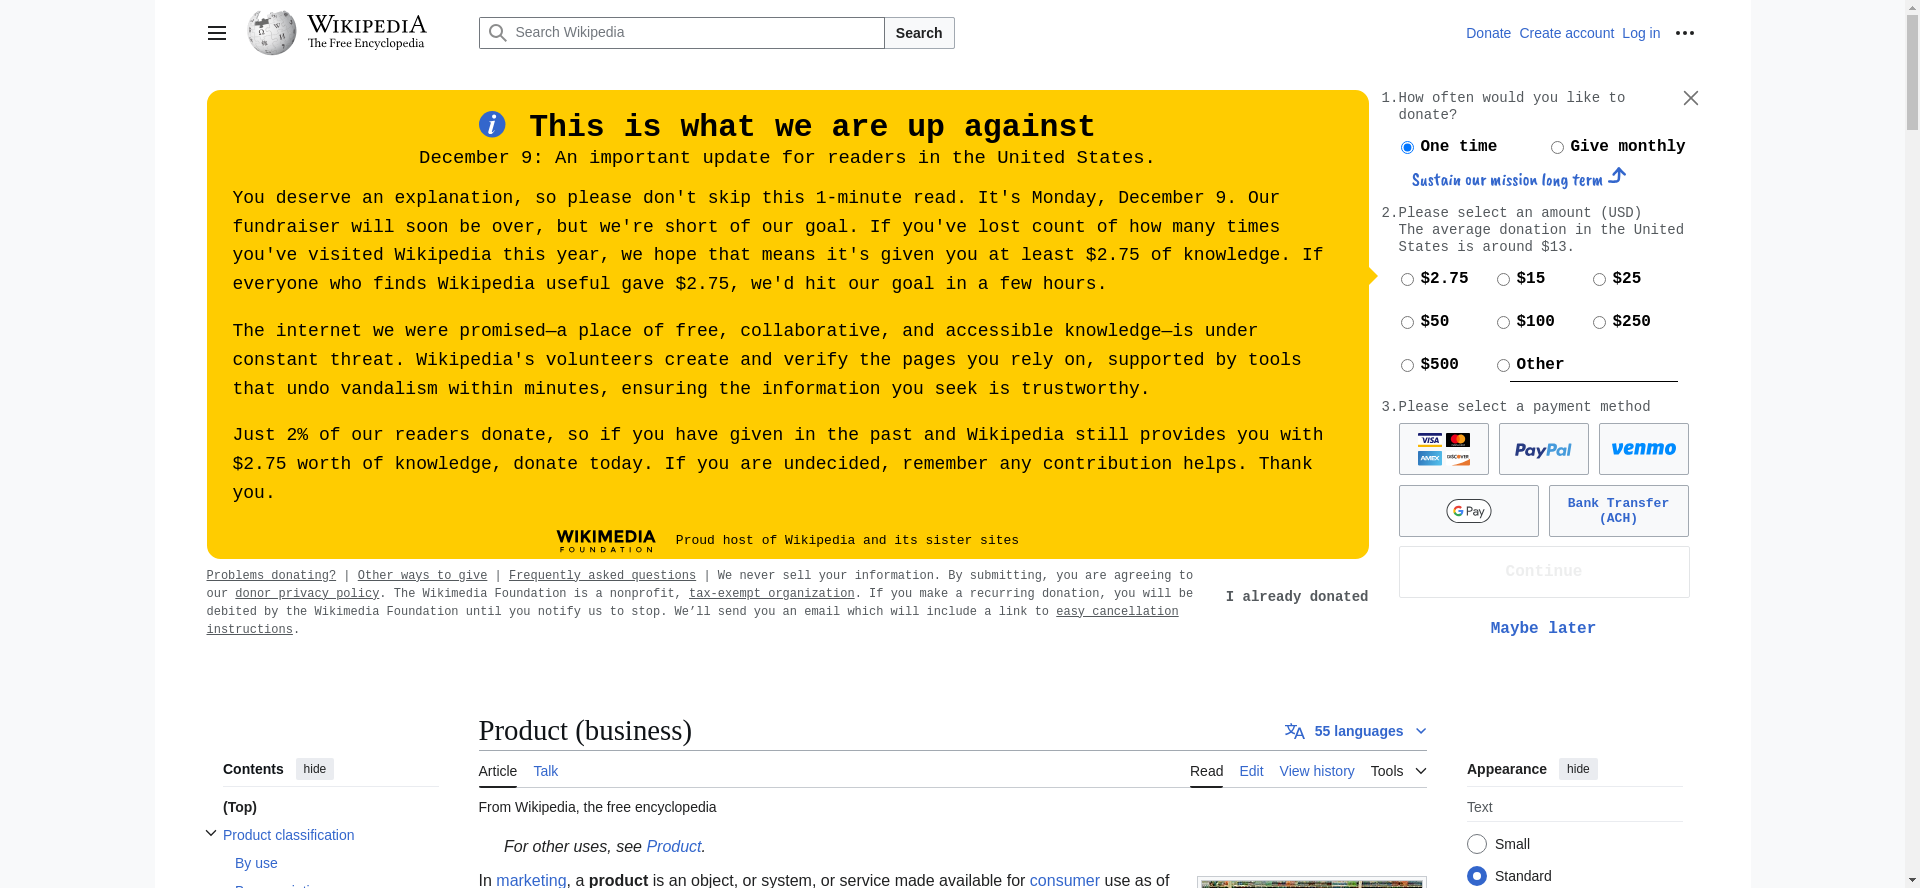

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

scraping_screenshot = cv2.imread('scraping_screenshot.png')
cv2_imshow(scraping_screenshot)

### Handling Interactions (Clicking Buttons, Scrolling)

#### Clicking Buttons

In [ ]:
#load the page
driver = web_driver()
driver.get("https://en.wikipedia.org/wiki/Product_(business)")
print(driver.title)
print(driver.current_url)

Product (business) - Wikipedia
https://en.wikipedia.org/wiki/Product_(business)


In [ ]:
# Find a button using its CSS class
button = driver.find_element(By.CSS_SELECTOR, 'button.cdx-button')  # Replace with your button's selector
button.text

'Search'

In [ ]:
# Find a button using its CSS class and click it
button = driver.find_element(By.CSS_SELECTOR, 'button.cdx-button')  # Replace with your button's selector
button.click()

# Take a screenshot and save it to a file
driver.save_screenshot('scraping_screenshot_btn_click.png')

True

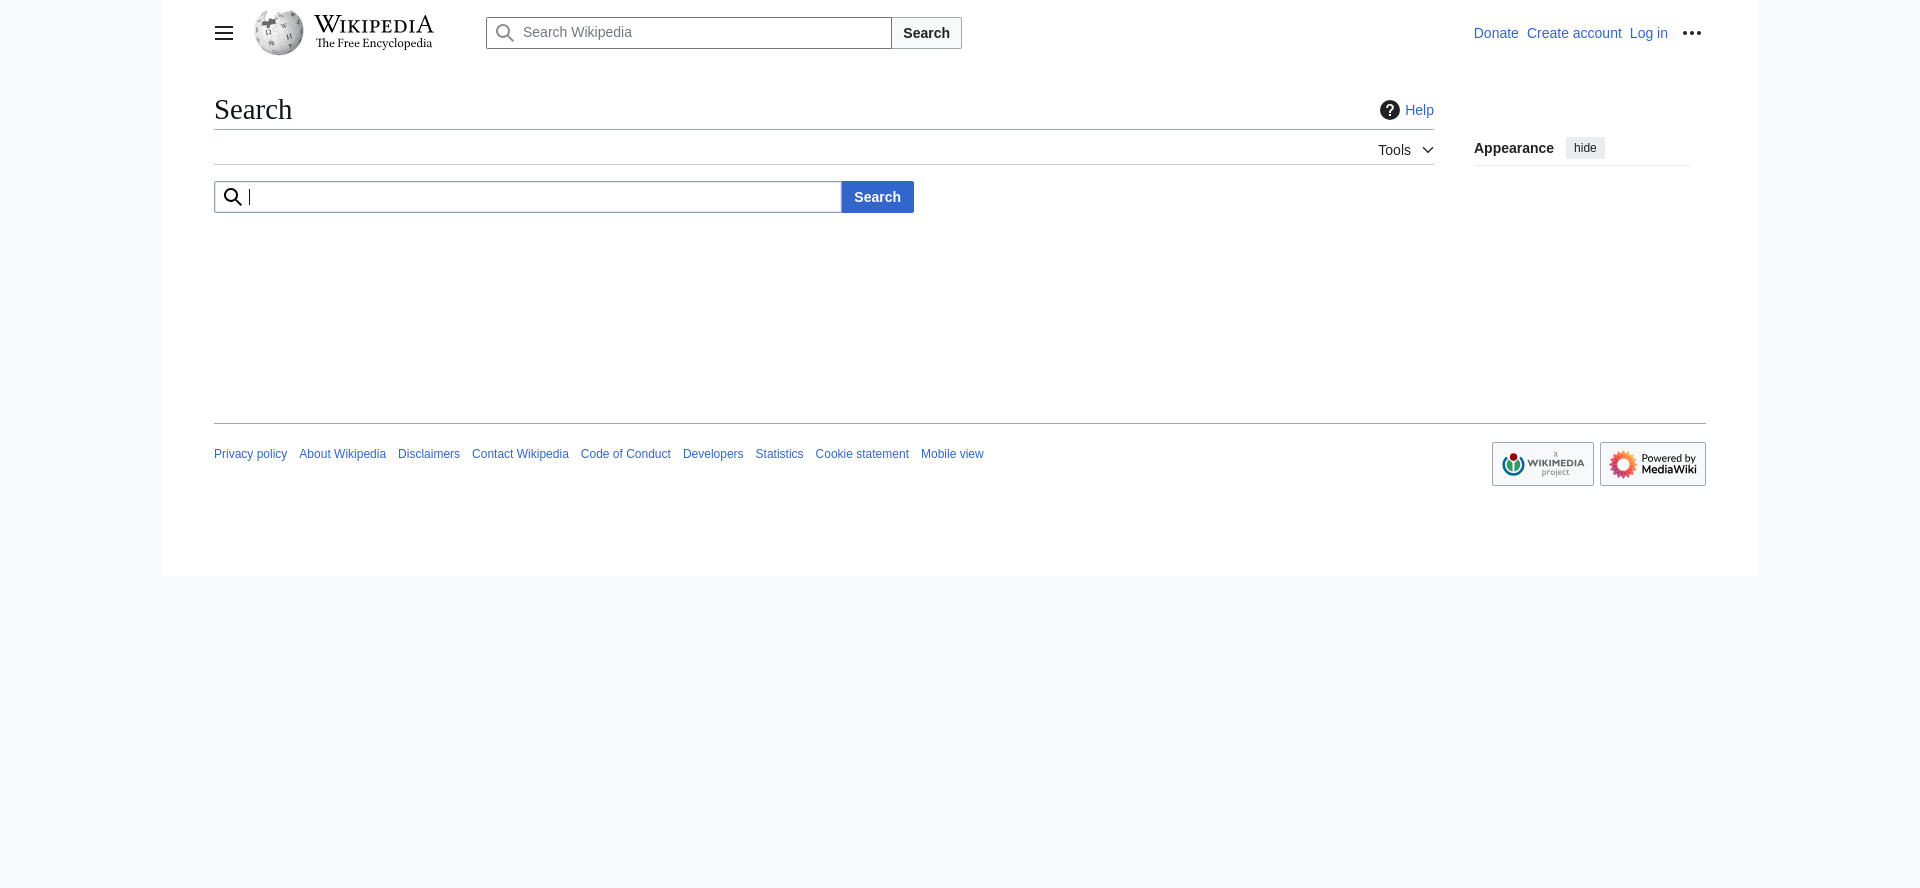

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

scraping_screenshot = cv2.imread('scraping_screenshot_btn_click.png')
cv2_imshow(scraping_screenshot)

#### Scrolling the Page using JavaScript

In [ ]:
driver = web_driver()
driver.get("https://en.wikipedia.org/wiki/Product_(business)")
print(driver.title)
print(driver.current_url)

Product (business) - Wikipedia
https://en.wikipedia.org/wiki/Product_(business)


Scroll to page bottom by javascript

`window.scrollTo(0, document.body.scrollHeight);`

In [ ]:
# Scroll down the page using JavaScript
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

# Take a screenshot and save it to a file
driver.save_screenshot('scraping_screenshot_scroll_page.png')

True

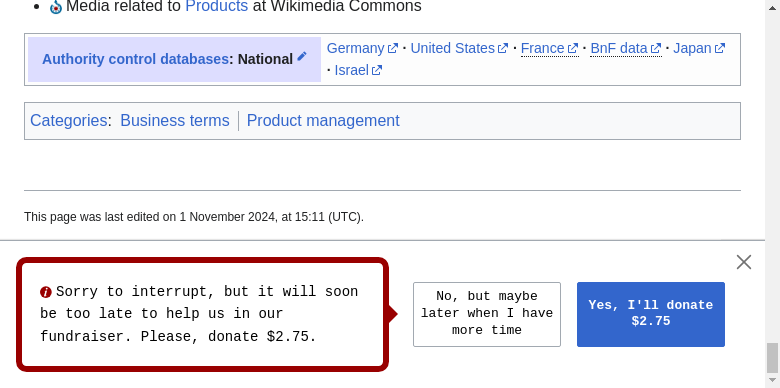

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

scraping_screenshot = cv2.imread('scraping_screenshot_scroll_page.png')
cv2_imshow(scraping_screenshot)

#### Scrolling to an Element (using ActionChains)

ActionChains: This is a class in Selenium that helps with advanced interactions, like mouse movements and keyboard actions. Here, it is used to scroll to the desired element (move_to_element()).

In [ ]:
from selenium.webdriver.common.action_chains import ActionChains

# Locate the element you want to scroll to
element = driver.find_element(By.CLASS_NAME, 'mw-heading3')

# Use ActionChains to scroll to the element
actions = ActionChains(driver)
actions.move_to_element(element).perform()


# Take a screenshot and save it to a file
driver.save_screenshot('scraping_screenshot_scroll_to_element.png')

True

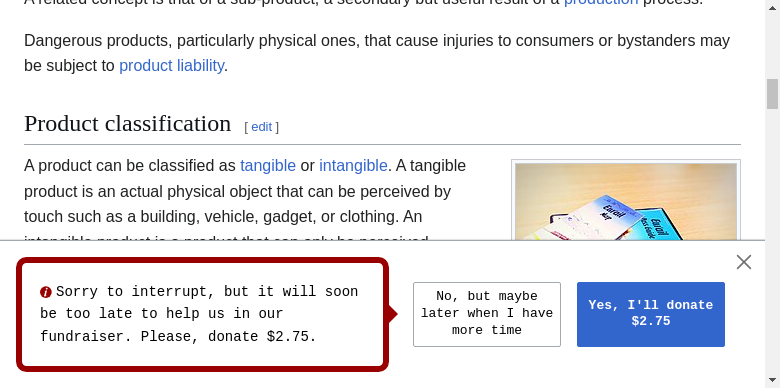

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

scraping_screenshot = cv2.imread('scraping_screenshot_scroll_to_element.png')
cv2_imshow(scraping_screenshot)

#### Handling Keyboard Inputs (e.g., typing into text fields)

In [ ]:
driver = web_driver()
driver.get("https://en.wikipedia.org/wiki/Product_(business)")
print(driver.title)
print(driver.current_url)

Product (business) - Wikipedia
https://en.wikipedia.org/wiki/Product_(business)


In [ ]:
# click search-button to open search space
driver.set_window_size(1920, 1080)
button = driver.find_element(By.CSS_SELECTOR, 'button.cdx-button')  # Replace with your button's selector
print(button.text)
button.click()

Search


In [ ]:
from selenium.webdriver.common.keys import Keys

# Find the text field (e.g., search box) and type into it
search_box = driver.find_element(By.CSS_SELECTOR, 'input.oo-ui-inputWidget-input')  # Replace with your input selector
search_box.send_keys("Purushotham")  # Simulate typing

# Take a screenshot and save it to a file
driver.save_screenshot('scraping_screenshot_keyboard_input_1.png')

search_box.send_keys(Keys.RETURN)  # Simulate pressing Enter

# Take a screenshot and save it to a file
driver.save_screenshot('scraping_screenshot_keyboard_input_2.png')

True

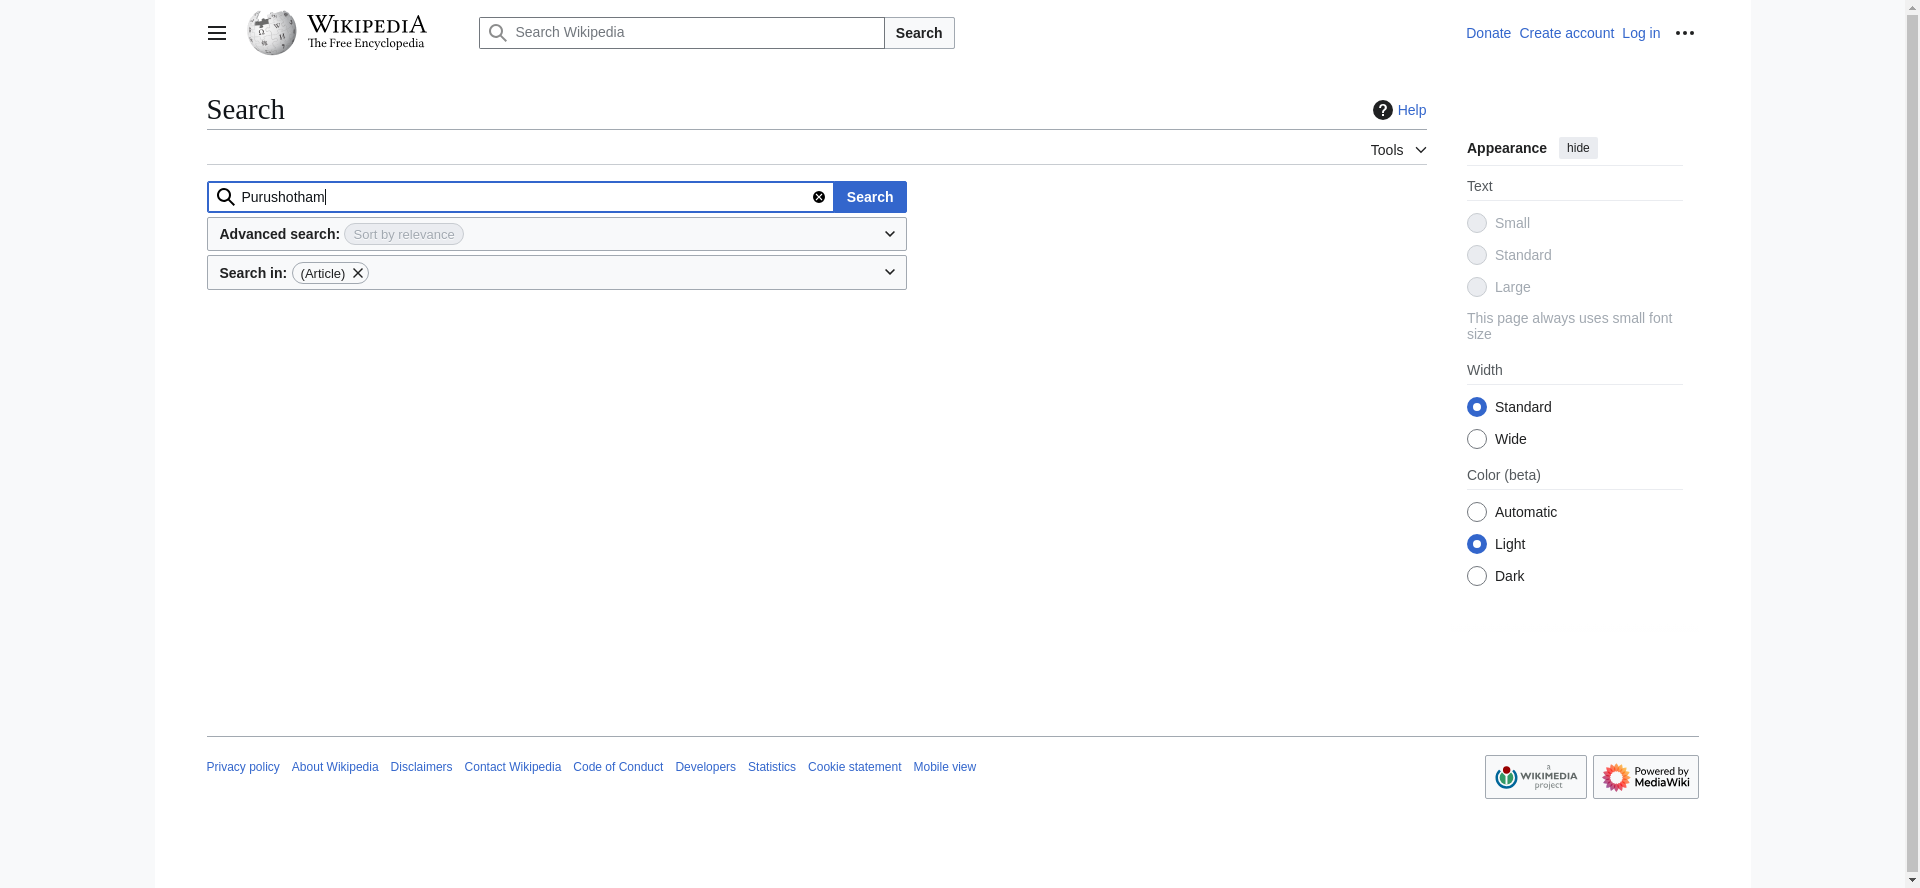

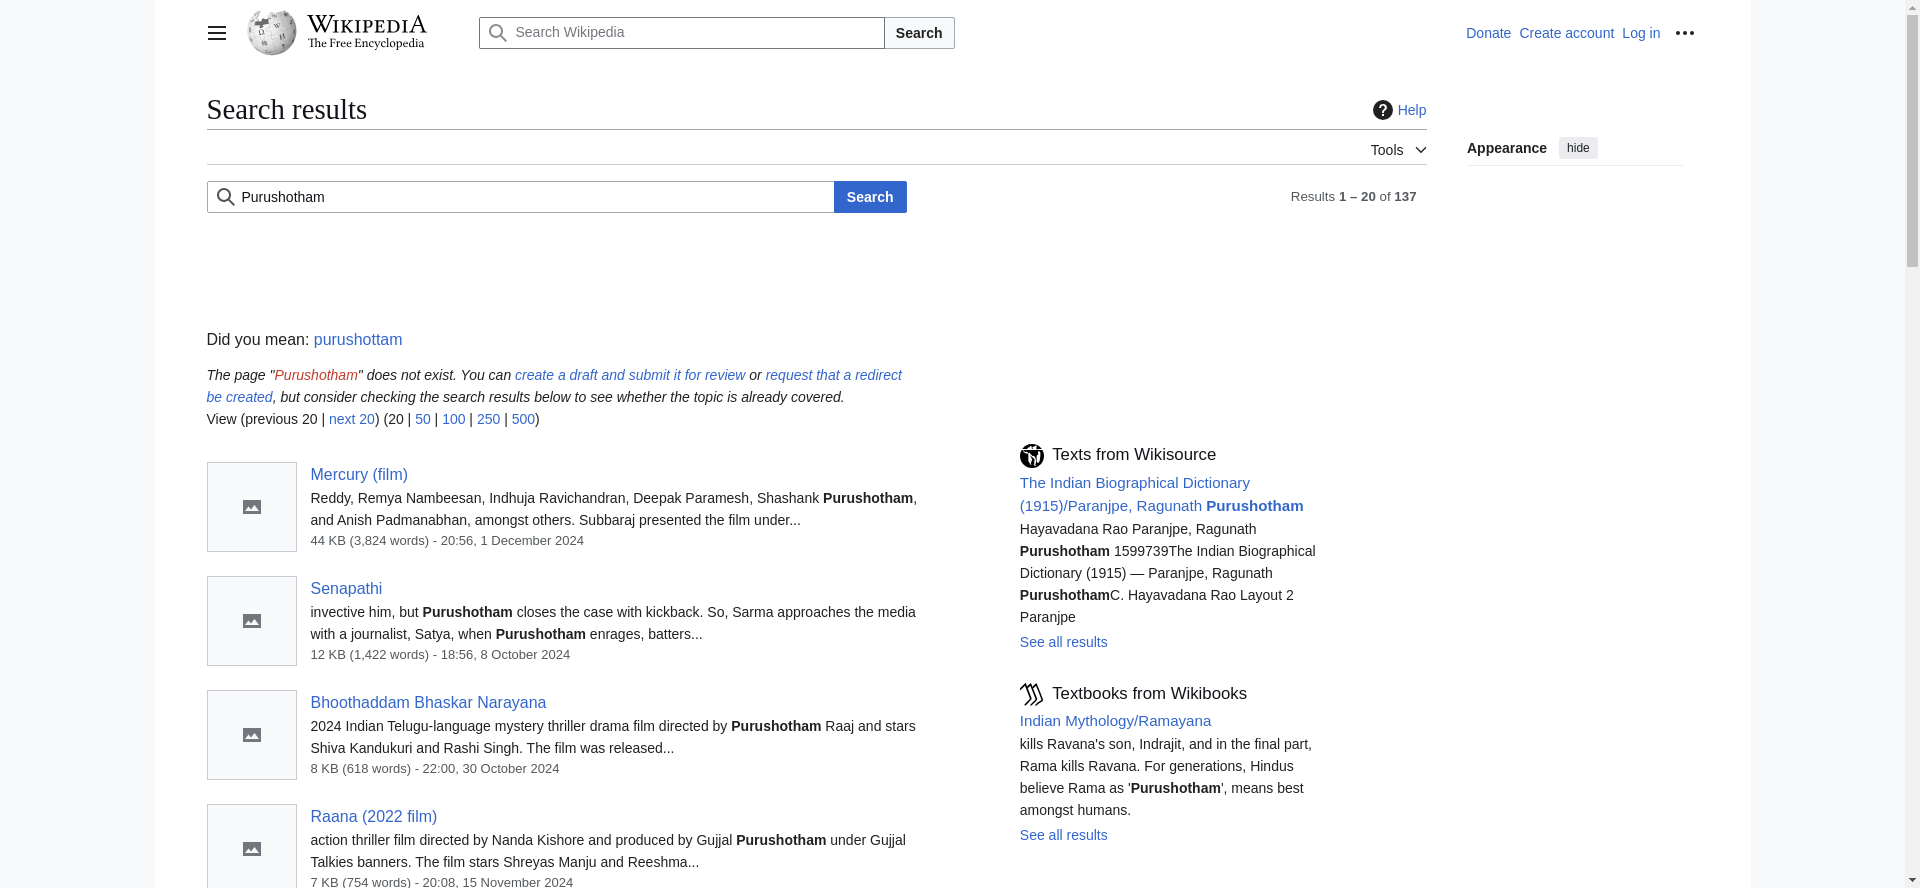

In [ ]:
scraping_screenshot = cv2.imread('scraping_screenshot_keyboard_input_1.png')
cv2_imshow(scraping_screenshot)

scraping_screenshot = cv2.imread('scraping_screenshot_keyboard_input_2.png')
cv2_imshow(scraping_screenshot)

####Handling Alerts and Popups


**How to Handle Alerts in Selenium?**

Handling alerts manually is a tedious task. To reduce human intervention and ease this task, Selenium provides a wide range of functionalities and methods to handle alerts.



The following methods are useful to handle alerts in Selenium:

1. Void dismiss(): This method is used when the ‘Cancel’ button is clicked in the alert box.

  `driver.switchTo().alert().dismiss();`

2. Void accept(): This method is used to click on the ‘OK’ button of the alert.

  `driver.switchTo().alert().accept();`

3. String getText(): This method is used to capture the alert message.

  `driver.switchTo().alert().getText();`

4. Void sendKeys(String stringToSend): This method is used to send data to the alert box.

  `driver.switchTo().alert().sendKeys("Text");`

In [ ]:
driver = web_driver()
driver.get("https://demoqa.com/alerts")
print(driver.title)
print(driver.current_url)

DEMOQA
https://demoqa.com/alerts


In [ ]:
import time

driver.set_window_size(1920, 1080)
driver.find_element(By.ID, 'alertButton').click()

In [ ]:
from selenium.webdriver.common.alert import Alert

# Switch to the alert and accept it
alert = Alert(driver)
alert.accept()

###Waiting for an element to be present